# **Introdução:**

Nesse estudo feito junto à *Hashtag Treinamentos*, vamos aprender uma pitadinha da integração do Python com plataformas financeiras de forma dinâmica e gerando insights a partir dos dados.

### ***Preparando ambiente Python:***

Importando Bibliotecas necessárias

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import numpy as np

import pandas_datareader.data as pdr
import yfinance

yfinance.pdr_override() #sobrescrever o pandas datareader

As duas novas bibliotecas vão permitir nos comunicarmos com a plataforma ***Yahoo Finance*** de forma dinâmica.

# **Operacionalizando com as bibiliotecas**

Vamos, então, obter o índice ***IBOVESPA (BVSP)*** de forma dinâmica no nosso código Python e analisá-lo

In [45]:
data_inicial = datetime.now() - timedelta(days=360) #analizando o úlltimo 1 ano da variável
data_final = datetime.now()
print(f'de \n{data_inicial}\naté\n{data_final}')

#pegando os dados do Yahoo passando as datas acima:
df_ibov = pdr.get_data_yahoo("^BVSP", data_inicial, data_final)
display(df_ibov)

de 
2022-11-01 23:05:16.612201
até
2023-10-27 23:05:16.612217
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-03,116927.0,117373.0,114485.0,116896.0,116896.0,15634600
2022-11-04,116907.0,120039.0,116904.0,118155.0,118155.0,16209500
2022-11-07,118148.0,118240.0,115266.0,115342.0,115342.0,15221900
2022-11-08,115340.0,117072.0,114688.0,116160.0,116160.0,14239800
2022-11-09,116153.0,116183.0,113110.0,113580.0,113580.0,20531600
...,...,...,...,...,...,...
2023-10-23,113145.0,113680.0,112164.0,112785.0,112785.0,10701800
2023-10-24,112814.0,114249.0,112814.0,113762.0,113762.0,10711800
2023-10-25,113762.0,114319.0,112680.0,112830.0,112830.0,12306500


Gráfico com média móvel:

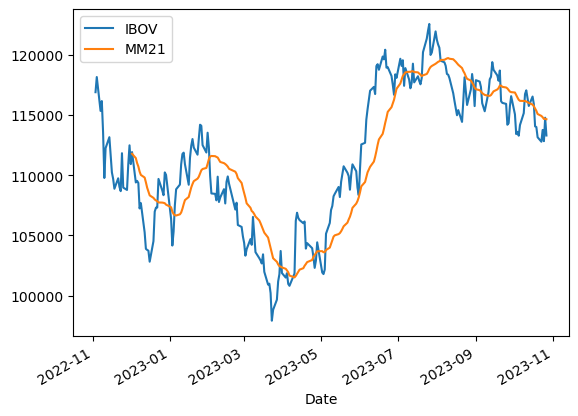

In [46]:
media_movel = df_ibov['Adj Close'].rolling(21).mean() #média móvel de 21 dias

df_ibov['Adj Close'].plot(label="IBOV")
media_movel.plot(label="MM21")
plt.legend()
plt.show()

Agora, vamos analisar ***o retorno do índice no último ano***

In [47]:
retorno_ibov = df_ibov['Adj Close'].iloc[-1] / df_ibov['Adj Close'].iloc[0] - 1
print(f"O retorno do IBOV foi: {retorno_ibov:.1%}")

O retorno do IBOV foi: -3.1%


Cada vez que rodarmos o código, veremos retorno em porcentagem no tempo definido e de forma sempre **atualizada**

# **Analisando Carteiras de investimentos:**

Agora, vamos fazer uma análise de performance de uma ***carteira personalizada*** fictícia em um excel usando Python:

In [48]:
df_carteira = pd.read_excel("Carteira.xlsx") #importando carteira no Excel
display(df_carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,100
3,BBDC4,Ação,100
4,ITUB4,Ação,300
5,ENEV3,Ação,100
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,NTCO3,Ação,100
9,BCRI11,FII,100


Agora, faremos o mesmo processo importando os ativos do Yahoo Finance:

In [49]:
data_inicial = datetime.now() - timedelta(days=360)
data_final = datetime.now()

lista_ativos = list(df_carteira["Ativos"].astype(str) + ".SA") #separando nossos ativos numa lista

print(f'de \n{data_inicial}\naté\n{data_final}')

#procurando ativo.SA no Yahoo Finance e pegando apenas o fechamento da ação
df_cotacoes = pdr.get_data_yahoo(lista_ativos, data_inicial, data_final)["Adj Close"] 

display(df_cotacoes)

de 
2022-11-01 23:05:17.768294
até
2023-10-27 23:05:17.768311
[*********************100%%**********************]  13 of 13 completed


,BBDC4.SA,BCRI11.SA,BOVA11.SA,BPAC11.SA,ENEV3.SA,ITUB4.SA,KNRI11.SA,MGLU3.SA,MOVI3.SA,NTCO3.SA,SMAL11.SA,VILG11.SA,XPLG11.SA
Date,,,,,,,,,,,,,
2022-11-03,18.360479,91.603516,113.099998,28.081194,13.64,28.553009,134.456589,4.87,13.507686,14.47,114.870003,99.780731,98.339203
2022-11-04,18.163860,91.361847,114.000000,28.586636,14.21,28.656872,134.187302,4.83,13.720557,14.35,115.500000,99.752922,98.763435
2022-11-07,17.564640,91.343948,111.220001,27.643791,13.72,28.005363,133.620865,4.54,13.043237,13.42,110.580002,100.439323,98.274643
2022-11-08,17.396109,90.574257,112.300003,27.828470,13.86,27.920387,133.871567,4.63,11.988554,13.09,111.180000,100.550644,98.671204
2022-11-09,14.371921,90.440002,109.750000,27.361910,13.81,26.579603,132.692291,4.47,11.195123,13.14,109.150002,99.437538,98.422211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-23,14.180000,67.900002,109.349998,30.360001,11.19,26.990000,158.779999,1.51,9.290000,12.95,95.470001,102.650002,109.589996
2023-10-24,14.180000,68.059998,110.239998,30.860001,11.23,26.990000,159.330002,1.41,9.340000,13.43,96.300003,102.470001,107.809998
2023-10-25,14.140000,67.529999,109.349998,30.850000,11.04,27.040001,160.320007,1.44,8.900000,12.75,94.709999,103.099998,107.320000


In [50]:
print(df_cotacoes.info())
print('\n')
df_cotacoes.isna().any()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247 entries, 2022-11-03 to 2023-10-27
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BBDC4.SA   247 non-null    float64
 1   BCRI11.SA  247 non-null    float64
 2   BOVA11.SA  247 non-null    float64
 3   BPAC11.SA  246 non-null    float64
 4   ENEV3.SA   247 non-null    float64
 5   ITUB4.SA   247 non-null    float64
 6   KNRI11.SA  247 non-null    float64
 7   MGLU3.SA   247 non-null    float64
 8   MOVI3.SA   247 non-null    float64
 9   NTCO3.SA   247 non-null    float64
 10  SMAL11.SA  247 non-null    float64
 11  VILG11.SA  247 non-null    float64
 12  XPLG11.SA  247 non-null    float64
dtypes: float64(13)
memory usage: 27.0 KB
None




BBDC4.SA     False
BCRI11.SA    False
BOVA11.SA    False
BPAC11.SA     True
ENEV3.SA     False
ITUB4.SA     False
KNRI11.SA    False
MGLU3.SA     False
MOVI3.SA     False
NTCO3.SA     False
SMAL11.SA    False
VILG11.SA    False
XPLG11.SA    False
dtype: bool

Tratando valores NaN preenchendo com a mesma do dia anterior, que faz sentido por se tratar de cotações 

In [51]:
df_cotacoes = df_cotacoes.ffill() #comando que preenche com o valor anterior 
df_cotacoes.isna().any()

BBDC4.SA     False
BCRI11.SA    False
BOVA11.SA    False
BPAC11.SA    False
ENEV3.SA     False
ITUB4.SA     False
KNRI11.SA    False
MGLU3.SA     False
MOVI3.SA     False
NTCO3.SA     False
SMAL11.SA    False
VILG11.SA    False
XPLG11.SA    False
dtype: bool

Vamos agora exibir nossas informações, porém, vamos usar um valor normalizado em relação ao valor da ação no início do período... Isso devido à oscilação de preços entre ações e podemos ver as oscilações em proporção:

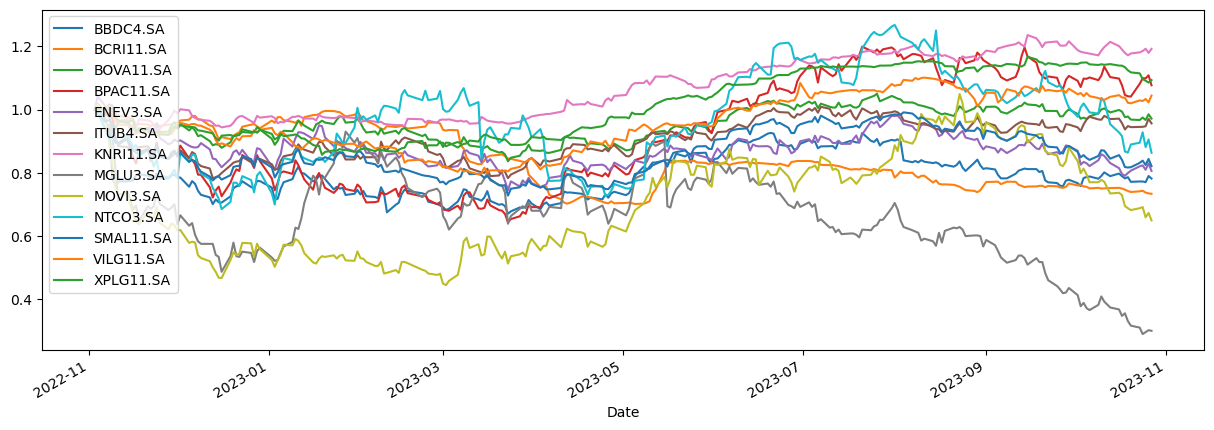

In [52]:
df_cotacoes_norm = df_cotacoes / df_cotacoes.iloc[0]
df_cotacoes_norm.plot(figsize=(15, 5))
plt.legend(loc="upper left")
plt.show()

Analisando performance de cada ação no período:

In [53]:
retorno_ibov = df_cotacoes.iloc[-1] / df_cotacoes.iloc[0] - 1
i=0

from colorama import Fore, Back, Style
lista_ativos = list(df_cotacoes.keys())

for retorno in retorno_ibov:
    if retorno > 0:
        print(f"O retorno do {Fore.GREEN + lista_ativos[i] + Style.RESET_ALL} foi: {Fore.GREEN}{retorno:.1%}{Style.RESET_ALL}")
    else:
        print(f"O retorno do {Fore.RED + lista_ativos[i] + Style.RESET_ALL} foi: {Fore.RED}{retorno:.1%}{Style.RESET_ALL}")
    i+=1

O retorno do BBDC4.SA foi: -21.8%
O retorno do BCRI11.SA foi: -26.7%
O retorno do BOVA11.SA foi: -2.9%
O retorno do BPAC11.SA foi: 7.7%
O retorno do ENEV3.SA foi: -19.4%
O retorno do ITUB4.SA foi: -4.4%
O retorno do KNRI11.SA foi: 19.2%
O retorno do MGLU3.SA foi: -70.0%
O retorno do MOVI3.SA foi: -35.1%
O retorno do NTCO3.SA foi: -13.7%
O retorno do SMAL11.SA foi: -17.9%
O retorno do VILG11.SA foi: 4.4%
O retorno do XPLG11.SA foi: 9.3%


Agora que conseguimos analisar ação por ação na nossa carteira, vamos retomar e ver o desempenho real da nossa carteira:

In [54]:
display(df_carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,100
3,BBDC4,Ação,100
4,ITUB4,Ação,300
5,ENEV3,Ação,100
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,NTCO3,Ação,100
9,BCRI11,FII,100


Acima, podemos ver que tempos a ***Quantidade de ações compradas*** de cada ativo, portanto, vamos fazer os cálculos e analisar o desempenho da nossa carteira:

In [55]:
df_valor_investido = pd.DataFrame()

for ativo in df_carteira["Ativos"]:
    qtde_acoes = df_carteira.loc[df_carteira["Ativos"]==ativo, "Qtde"].values[0]
    df_valor_investido[ativo] = qtde_acoes * df_cotacoes[f"{ativo}.SA"]

df_valor_investido["Total"] = df_valor_investido.sum(axis=1)
display(df_valor_investido)

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11,Total
Date,,,,,,,,,,,,,,
2022-11-03,11309.999847,11487.000275,486.999989,1836.047935,8565.902710,1364.000034,1350.768566,2808.119392,1447.000027,9160.351562,9978.073120,13445.658875,9833.920288,83073.842621
2022-11-04,11400.000000,11550.000000,482.999992,1816.386032,8597.061539,1421.000004,1372.055721,2858.663559,1435.000038,9136.184692,9975.292206,13418.730164,9876.343536,83339.717484
2022-11-07,11122.000122,11058.000183,453.999996,1756.464005,8401.609039,1372.000027,1304.323673,2764.379120,1342.000008,9134.394836,10043.932343,13362.086487,9827.464294,81942.654133
2022-11-08,11230.000305,11118.000031,463.000011,1739.610863,8376.116180,1385.999966,1198.855400,2782.847023,1309.000015,9057.425690,10055.064392,13387.156677,9867.120361,81970.196915
2022-11-09,10975.000000,10915.000153,446.999979,1437.192059,7973.880959,1381.000042,1119.512272,2736.190987,1314.000034,9044.000244,9943.753815,13269.229126,9842.221069,80397.980738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-23,10934.999847,9547.000122,150.999999,1418.000031,8096.999931,1118.999958,928.999996,3036.000061,1294.999981,6790.000153,10265.000153,15877.999878,10958.999634,80418.999743
2023-10-24,11023.999786,9630.000305,140.999997,1418.000031,8096.999931,1122.999954,934.000015,3086.000061,1343.000031,6805.999756,10247.000122,15933.000183,10780.999756,80562.999928
2023-10-25,10934.999847,9470.999908,144.000006,1414.000034,8112.000275,1103.999996,889.999962,3085.000038,1275.000000,6752.999878,10309.999847,16032.000732,10731.999969,80257.000494


In [56]:
retorno_bruto = df_valor_investido.iloc[-1] - df_valor_investido.iloc[0] 
i=0
lista_ativos = list(df_valor_investido.keys())

for saldo in retorno_bruto:
    if lista_ativos[i] == 'Total': 
        break
    elif saldo > 0:
        print(f"O saldo do {Fore.GREEN + lista_ativos[i] + Style.RESET_ALL} foi: {Fore.GREEN}R${saldo:,.2f}{Style.RESET_ALL}")
    else:
        print(f"O saldo do {Fore.RED + lista_ativos[i] + Style.RESET_ALL} foi: {Fore.RED}R${saldo:,.2f}{Style.RESET_ALL}")
    i+=1
    
    
rentabilidade_total = df_valor_investido["Total"].iloc[-1] - df_valor_investido["Total"].iloc[0]

print()

if rentabilidade_total> 0:
    print(f"O saldo Total é de {Fore.GREEN}R${rentabilidade_total:,.2f}{Style.RESET_ALL}")
else:
    print(f"O saldo Total é de {Fore.RED}R${rentabilidade_total:,.2f}{Style.RESET_ALL}")
    

O saldo do BOVA11 foi: R$-325.00
O saldo do SMAL11 foi: R$-2,057.00
O saldo do MGLU3 foi: R$-341.00
O saldo do BBDC4 foi: R$-401.05
O saldo do ITUB4 foi: R$-375.90
O saldo do ENEV3 foi: R$-265.00
O saldo do MOVI3 foi: R$-473.77
O saldo do BPAC11 foi: R$215.88
O saldo do NTCO3 foi: R$-198.00
O saldo do BCRI11 foi: R$-2,442.35
O saldo do VILG11 foi: R$439.93
O saldo do KNRI11 foi: R$2,578.34
O saldo do XPLG11 foi: R$917.08

O saldo Total é de R$-2,727.84


Podemos acompanhar a carteira em relação ao Ibovespa normalizado:

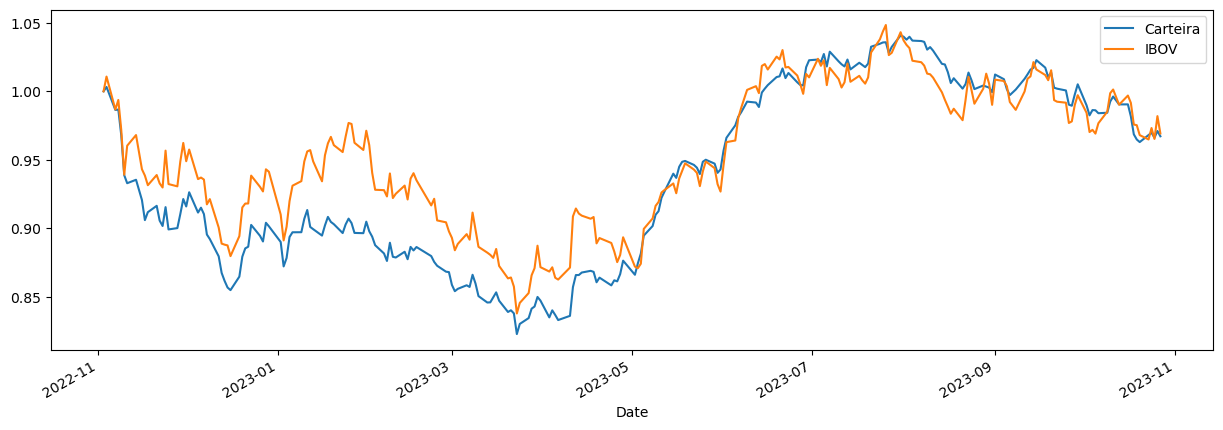

In [57]:
df_ibov_norm = df_ibov['Adj Close'] / df_ibov['Adj Close'].iloc[0]
df_valor_investido_norm = df_valor_investido / df_valor_investido.iloc[0]

df_valor_investido_norm["Total"].plot(label="Carteira", figsize=(15, 5))
df_ibov_norm.plot(label="IBOV")
plt.legend()
plt.show()

In [65]:
# Analisando o Retorno percentual em relação ao IBOV

retorno_ibov = df_ibov_norm[-1] - 1
retorno_carteira = df_valor_investido_norm["Total"][-1] - 1
correlacao = df_valor_investido["Total"].corr(df_ibov['Adj Close'])


print(f"Retorno IBOV: {retorno_ibov:.1%}")
print(f"Retorno Carteira: {retorno_carteira:.1%}")
print(f"Correlação Carteira e IBOV: {correlacao:.1%}")

Retorno IBOV: -3.1%
Retorno Carteira: -3.3%
Retorno Carteira: 95.3%


/var/folders/8l/tk9h9sw50f302y56n_qqj1_w0000gn/T/ipykernel_52290/4224379356.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno_ibov = df_ibov_norm[-1] - 1
/var/folders/8l/tk9h9sw50f302y56n_qqj1_w0000gn/T/ipykernel_52290/4224379356.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retorno_carteira = df_valor_investido_norm["Total"][-1] - 1
